# Imports:

In [8]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Video

# Classes:

In [142]:
class BallisticDeposition:
    """
    class fields :
    colors:the list of colors used in visualization

    the class to model Ballistic Deposition
    methods:
    step:
        the function to add an amount of objects

    miniStep:
        the function to add one object

    run:
        the function to do the process of Ballistic Deposition

    visualize:
        the function to show the states of the process

    result:
        the function to show the result of the process

    animate:
        the function to create an animation of the process

    """
    colors = ["blue","red"]
    def __init__(self, miniSteps: int, steps: int, length: int) -> None:
        """

        :param miniSteps: the amount of objects added after a step
        :type miniSteps: int
        :param steps: the amount of steps in the process
        :type steps: int
        :param length: the size of the platform in Ballistic Deposition
        :type length: int
        """
        self.miniSteps = miniSteps
        self.steps = steps
        self.length = length
        self.averages = []
        self.w = []
        self.x = np.zeros(length)
        self.t =range(1,steps+1)
        self.yTicks = range(0,int(3*miniSteps*steps/length),steps)
        self.data = []


    def step(self) -> None:
        """
        the function to add an amount of objects
        """
        for i in range(self.miniSteps):
            self.miniStep()


    def miniStep(self) -> None:
        """
        the function to add one object
        """
        index = np.random.uniform(0,self.length-1)
        self.x[int(index)] += 1

    def run(self) -> None:
        """
        the function to do the process of Ballistic Deposition
        """
        for i in range(self.steps):
            self.step()

            x_bar = sum(self.x)
            sigma = np.sqrt(np.var(self.x))
            self.averages.append(x_bar)
            self.w.append(sigma)
            self.data.append(self.x.copy())

    def visualize(self) -> None:
        """
        the function to show the states of the process
        """
        plt.clf()
        for i in range(1,self.steps+1):
            c = BallisticDeposition.colors[i%2]
            plt.bar(range(self.length),self.data[-i],color = c)
            plt.yticks(self.yTicks)

    def result(self) -> None:
        """
        the function to show the result of the process

        """
        plt.scatter(self.t,self.w)
        plt.title("w(t): ")
        plt.show()
        tArray = np.array(self.t)
        sigmasArray = np.array(self.w)
        logSigmas = np.log10(sigmasArray)
        logT = np.log10(tArray)
        plt.scatter(logT,logSigmas)
        plt.title("logW(logT): ")
        plt.show()

        print("r2 for log(w) and log(t): ",np.corrcoef(logT, logSigmas)[0][1])
        print("beta: ",np.polyfit(logT,logSigmas,1)[0])

    def animate(self) -> None:
        """
        the function to create an animation of the process

        """
        images = []
        for i in range(0,self.steps):
            c = bd.colors[i%2]
            plt.bar(range(self.length),self.data[i],color = c)
            plt.yticks(self.yTicks)
            plt.savefig(str(i)+".png")

            images.append(imageio.imread(str(i)+".png"))
        imageio.mimsave('movie.mp4', images)
        Video("./movie.mp4")



# Main Part:

### creating the ballistic deposition object and running:

In [143]:
bd = BallisticDeposition(1000,20,200)
bd.run()

### getting the result:

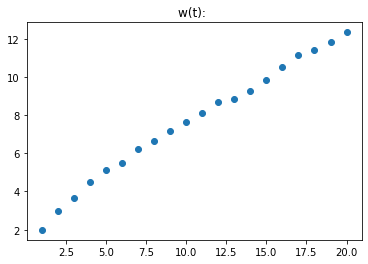

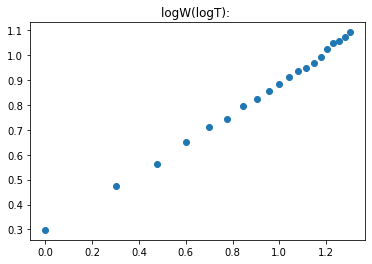

r2 for log(w) and log(t):  0.9987849228218644
beta:  0.6071185836643217


In [144]:
bd.result()

### visualizing the final state:

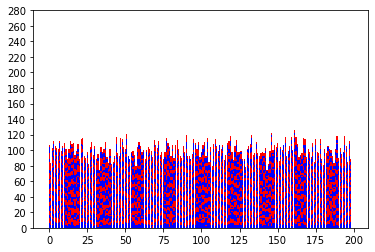

In [145]:
bd.visualize()

### shwing the dynamic of the Ballistic Deposition:

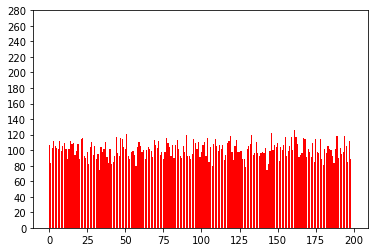

In [146]:
bd.animate()